# HR_ATTRITION_DATA
In this project , we need to predict whether a given employee will leave the organization or not. Our target column is Attrition. We will create a model, perform EDA and predict the target column using ML concepts

Made by: Vinit Sarode, Harshdip Patil

### Importing Packages

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn import metrics 

### Reading CSV File

In [2]:
data = pd.read_csv(r"HR_Employee_Attrition-1.csv")
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### Explainatory Data Analysis (EDA)

In [3]:
data.shape

(2940, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
numeric_cols = data.select_dtypes(include=['int64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [6]:
data[numeric_cols].head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1102,1,2,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,2,49,279,8,1,1,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1373,2,2,1,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,1392,3,4,1,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,591,2,1,1,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data[numeric_cols].describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
data.dtypes.sort_index()

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Looking for Duplicate Data

In [11]:
data.duplicated().sum()

0

In [12]:
data.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Data Analysis

In [13]:
attrition_count = pd.DataFrame(data['Attrition'].value_counts())
attrition_count

,Attrition
No,2466
Yes,474


Text(0.5, 1.0, 'Attrition Probability')

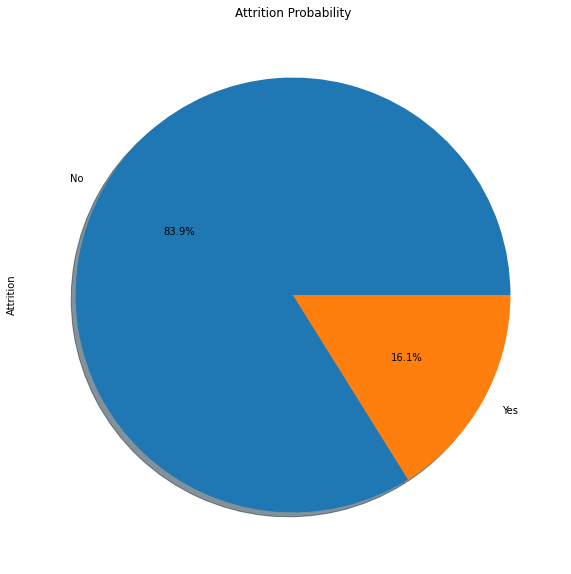

In [14]:
f, ax = plt.subplots(figsize=(10,10))
ax = data['Attrition'].value_counts(). plot.pie(explode=[0,0], autopct = '%1.1f%%', shadow=True)
ax.set_title('Attrition Probability')

<AxesSubplot:xlabel='Age', ylabel='count'>

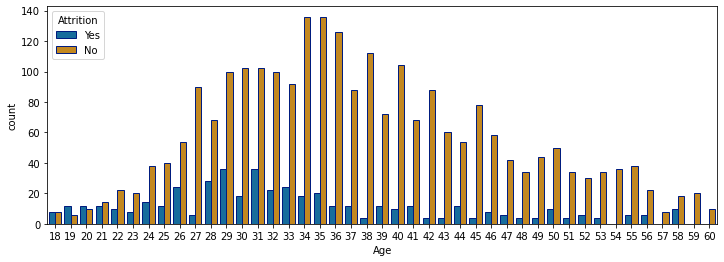

In [15]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(
    x='Age', 
    hue='Attrition', 
    data = data, 
    palette="colorblind", 
    ax = ax,  
    edgecolor=sns.color_palette("dark", n_colors = 1),
    )

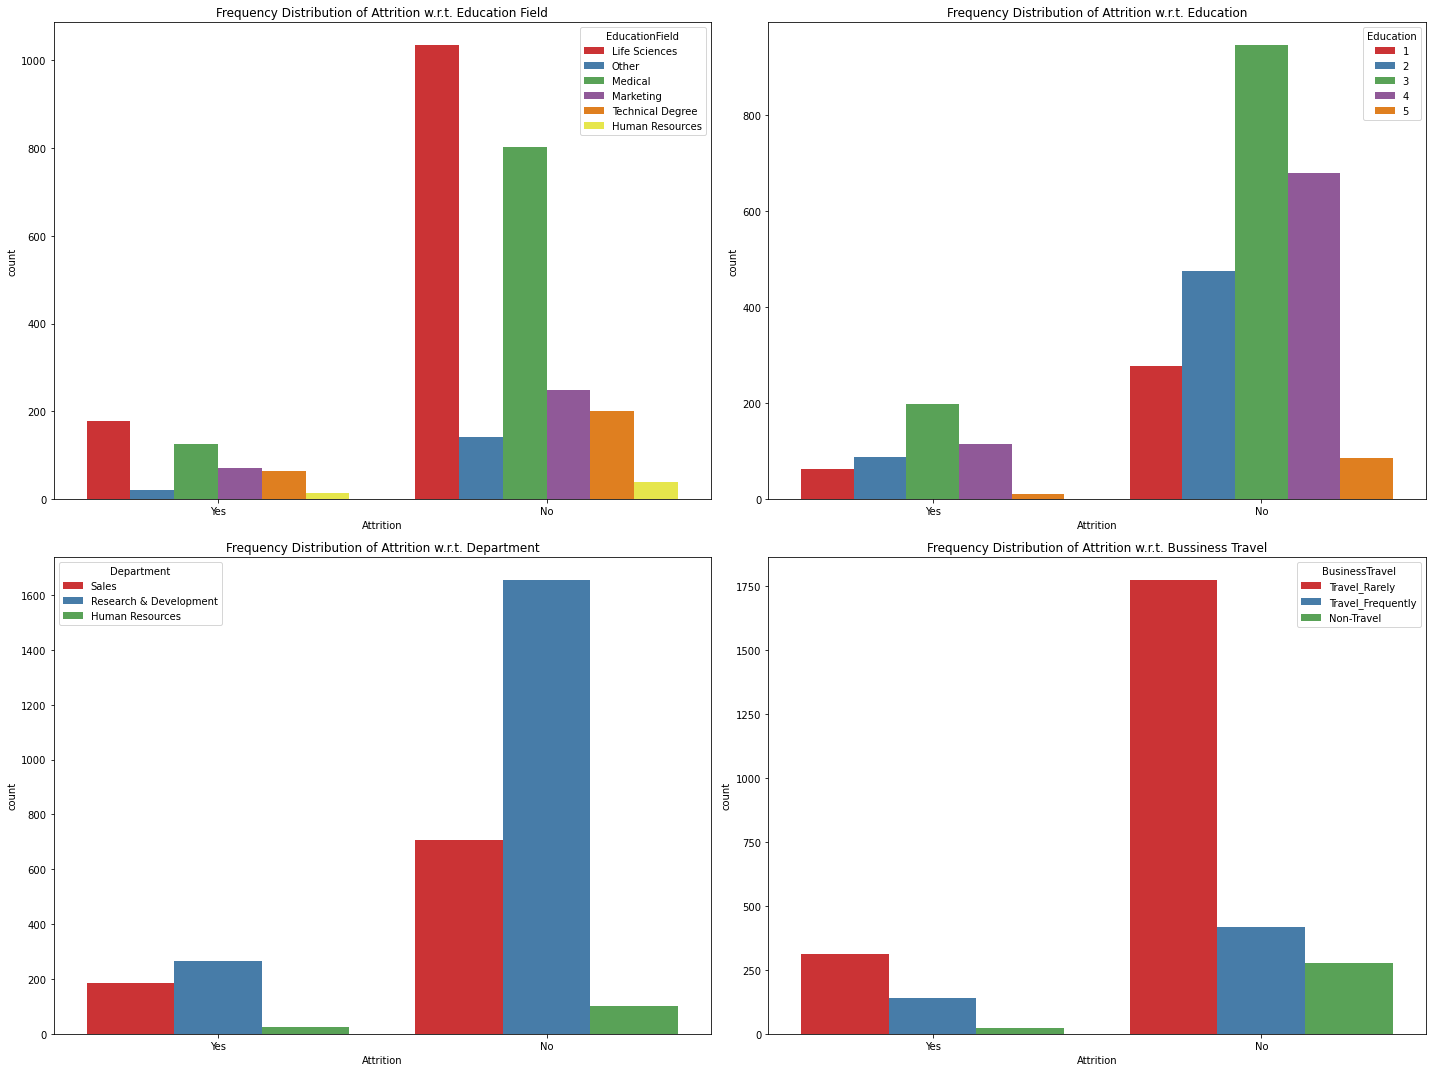

In [16]:
f, ax = plt.subplots(2,2, figsize=(20,15))

ax[0,0] = sns.countplot(x='Attrition', hue= 'EducationField', data=data, ax = ax[0,0], palette='Set1' )
ax[0,0].set_title("Frequency Distribution of Attrition w.r.t. Education Field")

ax[1,0] = sns.countplot(x='Attrition', hue= 'Department', data=data,  ax = ax[1,0], palette='Set1' )
ax[1,0].set_title("Frequency Distribution of Attrition w.r.t. Department")

ax[0,1] = sns.countplot(x='Attrition', hue= 'Education', data=data,  ax = ax[0,1], palette='Set1' )
ax[0,1].set_title("Frequency Distribution of Attrition w.r.t. Education")

ax[1,1] = sns.countplot(x='Attrition', hue= 'BusinessTravel', data=data,  ax = ax[1,1], palette='Set1' )
ax[1,1].set_title("Frequency Distribution of Attrition w.r.t. Bussiness Travel")


f.tight_layout()

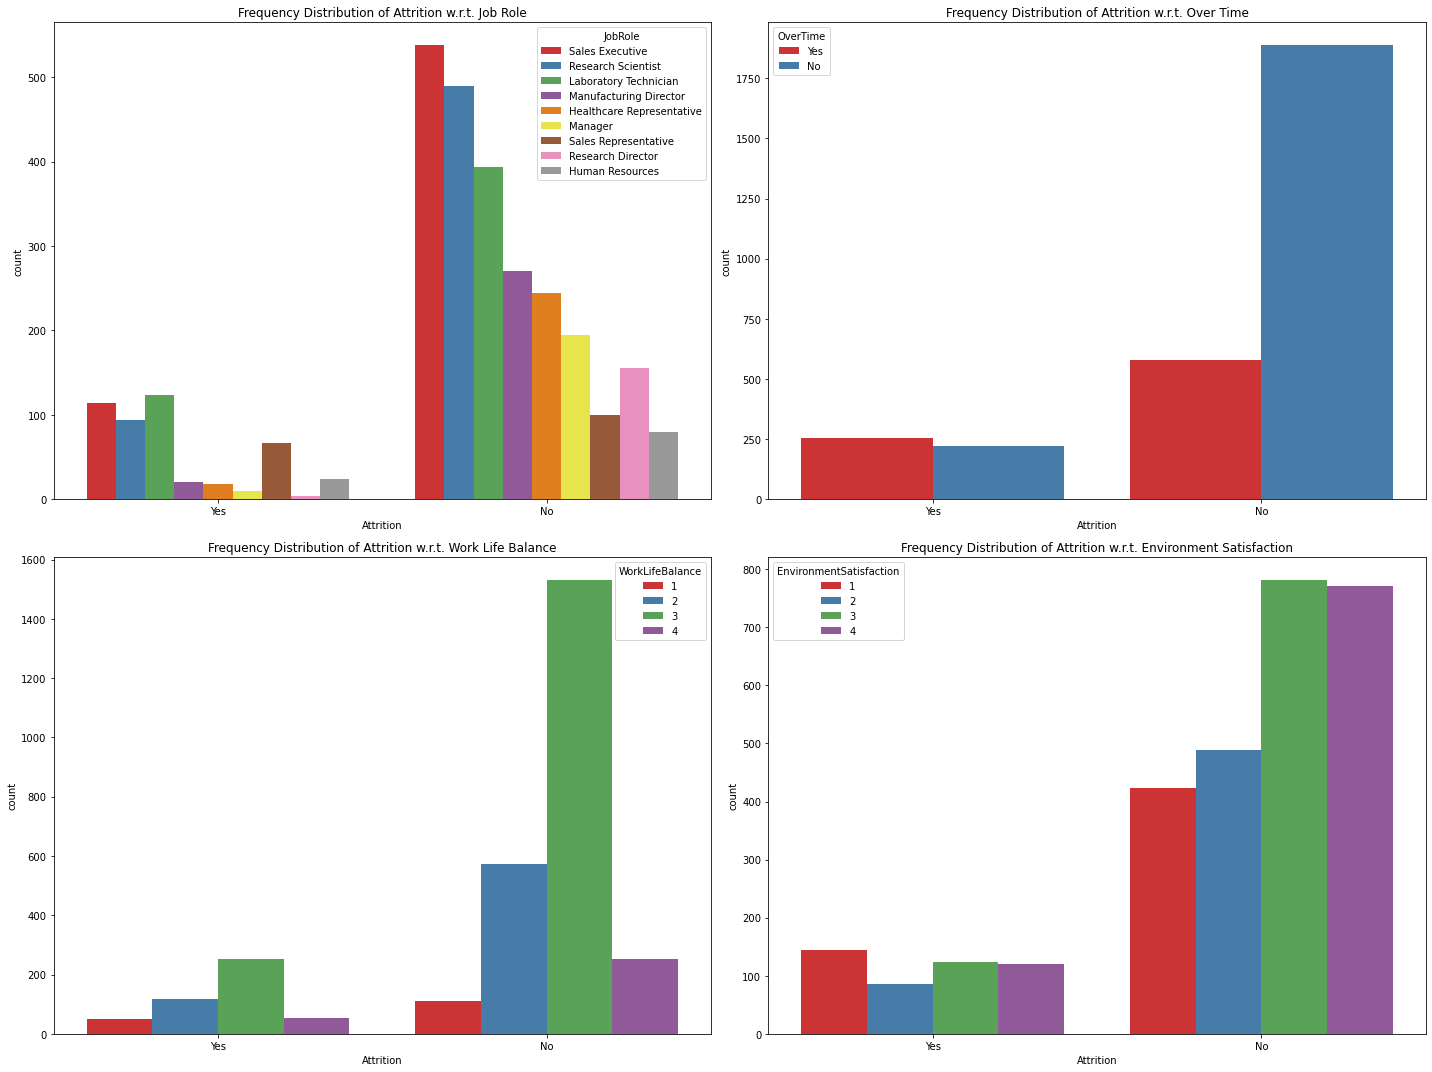

In [17]:
f, ax = plt.subplots(2,2, figsize=(20,15))

ax[0,0] = sns.countplot(x='Attrition', hue= 'JobRole', data=data, ax = ax[0,0], palette='Set1' )
ax[0,0].set_title("Frequency Distribution of Attrition w.r.t. Job Role")

ax[0,1] = sns.countplot(x='Attrition', hue= 'OverTime', data=data,  ax = ax[0,1],palette='Set1' )
ax[0,1].set_title("Frequency Distribution of Attrition w.r.t. Over Time")

ax[1,1] = sns.countplot(x='Attrition', hue= 'EnvironmentSatisfaction', data=data,  ax = ax[1,1],palette='Set1' )
ax[1,1].set_title("Frequency Distribution of Attrition w.r.t. Environment Satisfaction")

ax[1,0] = sns.countplot(x='Attrition', hue='WorkLifeBalance', data=data, ax = ax[1,0], palette='Set1')
ax[1,0].set_title("Frequency Distribution of Attrition w.r.t. Work Life Balance")

f.tight_layout()

### Object Data Types and Their Unique Values

#### Correlation of the columns

In [18]:
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("-"*90)

Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
------------------------------------------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
------------------------------------------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
------------------------------------------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dt

In [19]:
#Remove unneeded columns

#Remove the column EmployeeNumber
data = data.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
data = data.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
data = data.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
data = data.drop('Over18', axis = 1) #Contains only the value 'Yes'

In [20]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

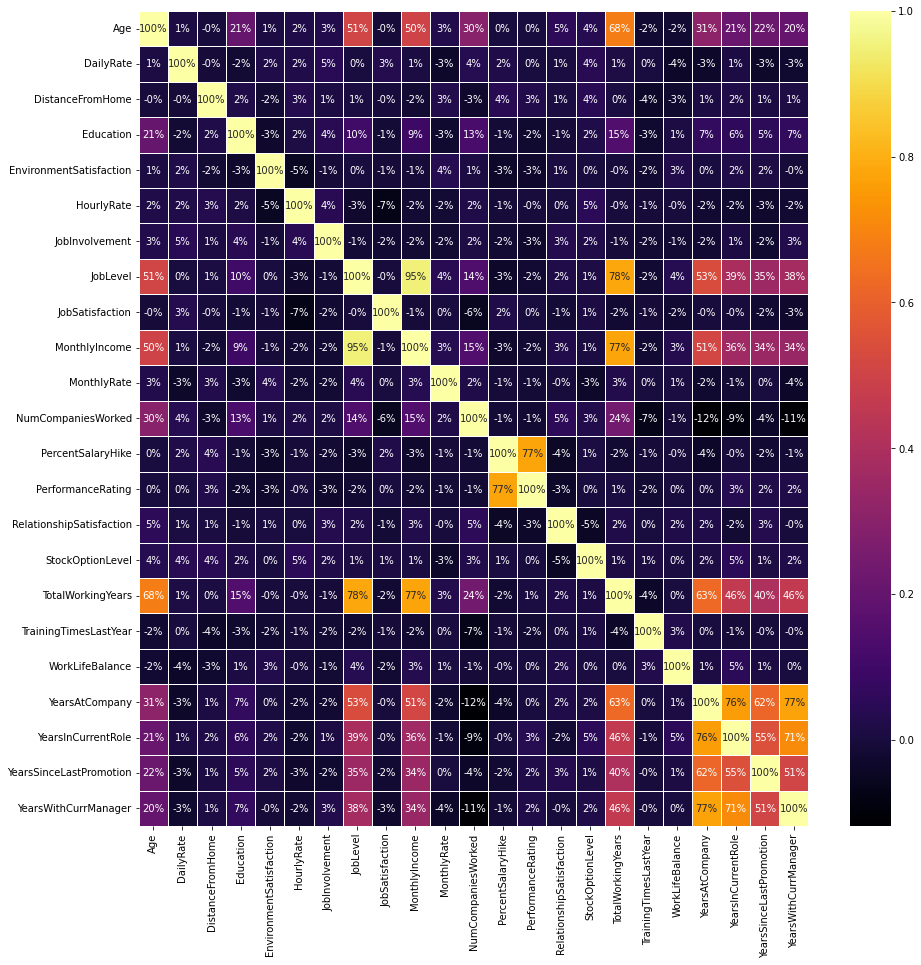

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(
    data.corr(), 
    annot=True, 
    fmt='.0%',
    linewidths=1,
    cmap='inferno'
)

In [26]:
data_train, data_test, data_train, data_test = train_test_split(data, data, test_size=0.2,random_state=42 )

In [27]:
print(data_train.shape, data_test.shape)

(2352, 31) (588, 31)


### converting categorical values to numerical values

In [28]:
encoder = ce.OrdinalEncoder(cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
data_train = encoder.fit_transform(data_train)
data_test = encoder.fit_transform(data_test)

### Data Preprocessing

In [31]:
from sklearn.preprocessing import LabelEncoder
x = data.drop('Attrition', axis=1)
y = data['Attrition']
for column in x.columns:
    if x[column].dtype == np.number:
        continue
    x[column] = LabelEncoder().fit_transform(x[column])

/var/folders/zf/dlbh52916sg6w9q521_6szb00000gn/T/ipykernel_91527/2783995813.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if x[column].dtype == np.number:


In [32]:
x['Age_Years'] = x['Age']
x = x.drop('Age', axis=1)
x

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,2,624,2,0,1,1,1,0,64,2,...,0,0,8,0,0,6,4,0,5,23
1,1,113,1,7,0,1,2,1,31,1,...,3,1,10,3,2,10,7,1,7,31
2,2,805,1,1,1,4,3,1,62,1,...,1,0,7,3,2,0,0,0,0,19
3,1,820,1,2,3,1,3,0,26,2,...,2,0,8,3,2,8,7,3,0,15
4,2,312,1,1,0,3,0,1,10,2,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,1,494,1,22,1,3,2,1,11,3,...,2,1,17,3,2,5,2,0,3,18
2936,2,327,1,5,0,3,3,1,12,1,...,0,1,9,5,2,7,7,1,7,21
2937,2,39,1,3,2,1,1,1,57,3,...,1,1,6,0,2,6,2,0,3,9
2938,1,579,2,1,2,3,3,1,33,1,...,3,0,17,3,1,9,6,0,8,31


In [33]:
print(x.columns)

Index(['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_Years'],
      dtype='object')


In [34]:
print(y)

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
2935     No
2936     No
2937     No
2938     No
2939     No
Name: Attrition, Length: 2940, dtype: object


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state = 0)
print(X_train.shape, X_test.shape)

(2205, 30) (735, 30)


In [37]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [38]:
score = forest.score(X_train, Y_train)
print('Accuracy Score:', np.abs(score)*100)

Accuracy Score: 99.50113378684807


### Accuracy Score: 99.5%

In [39]:
predict = forest.predict(X_test)

In [40]:
predict

array(['No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
M = confusion_matrix(Y_test, predict)
TN = M[0][0]
TP = M[1][1]
FN = M[1][0]
FP = M[0][1]

print(M)
print('Model testing accuracy="{}!"'.format((TP+TN)/(TP+TN+FN+FP)))
print(classification_report(Y_test, predict))

[[604   6]
 [ 33  92]]
Model testing accuracy="0.9469387755102041!"
              precision    recall  f1-score   support

          No       0.95      0.99      0.97       610
         Yes       0.94      0.74      0.83       125

    accuracy                           0.95       735
   macro avg       0.94      0.86      0.90       735
weighted avg       0.95      0.95      0.94       735

